In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas
import CoolProp.CoolProp as CP

import teqp
teqp.__version__

'0.16.1.dev0'

24.59 [4983.32499404  540.70739831] 0.902117265087372 5.3636489181332 bar
24.59 [ 9783.5203288  54712.26319915] 0.1516924021019218 5.363648918133006 bar
24.59 [ 9783.5203288  54712.26319915] 0.15169240210192303 5.363648918132808 bar
28.0 [2595.91360502  904.25187321] 0.7416545363833963 5.776374562908611 bar
28.0 [25309.43649797 13794.19932529] 0.647239980761997 5.776374562908715 bar
28.0 [ 5085.27852895 59764.10817002] 0.07841675592951387 5.776374562908453 bar
34.66 [10896.0641284   7601.55119593] 0.5890523690407687 16.12188732990558 bar
34.66 [10831.74647778  7544.98341489] 0.5894273105740119 16.121872280886777 bar
34.66 [11105.84961585  7785.99747894] 0.5878646783515924 16.122467306574695 bar
39.57 [ 6248.31638726 17891.08096559] 0.2588430976933788 23.231128785475576 bar
39.57 [ 6248.63013043 17893.1915261 ] 0.2588301006996267 23.2311287854758 bar
39.57 [ 6248.63070711 17893.19540599] 0.25883007680692727 23.231128785475573 bar
42.5 [ 2583.00181753 21554.1519094 ] 0.10701352142662796 

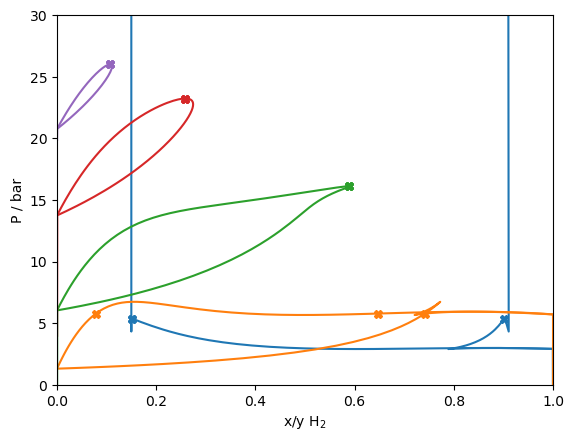

In [12]:
jH2Ne = {
    "kind": "QCPRAasen",
    "model": {
        "Ls": [156.21, 0.40453],
        "Ms": [-0.0062072, 0.95861],
        "Ns": [5.047, 0.8396],
        "As": [3.0696, 0.4673],
        "Bs": [12.682, 2.4634],
        "cs": [-3.8139, -2.4665],
        "Tcrit / K": [33.19, 44.492],
        "pcrit / Pa": [12.964e5, 26.79e5],
        "kmat": [[0.0, 0.18], [0.18, 0.0]],
        "lmat": [[0.0, 0.0], [0.0, 0.0]]
    }
}

model = teqp.make_model(jH2Ne)
for T in [24.59, 28.0, 34.66, 39.57, 42.50]:
    rhovecL0 = np.array([0.0, 0.0])
    rhovecV0 = np.array([0.0, 0.0])
    if T > 30:
        ipure = 1
        rhovecL0[ipure] = CP.PropsSI('Dmolar','T',T,'Q',0,'NEON')
        rhovecV0[ipure] = CP.PropsSI('Dmolar','T',T,'Q',1,'NEON')
    else:
        ipure = 0
        rhovecL0[ipure] = CP.PropsSI('Dmolar','T',T,'Q',0,'HYDROGEN')
        rhovecV0[ipure] = CP.PropsSI('Dmolar','T',T,'Q',1,'HYDROGEN')
        
    opt = teqp.TVLEOptions(); # opt.polish=True; opt.integration_order=5; opt.rel_err=1e-10
    trace = model.trace_VLE_isotherm_binary(T, rhovecL0, rhovecV0, opt)
    df = pandas.DataFrame(trace)

    # Plot the VLE solution
    line, = plt.plot(df['xL_0 / mole frac.'], df['pL / Pa']/1e5)
    plt.plot(df['xV_0 / mole frac.'], df['pL / Pa']/1e5, color=line.get_color())
    
    # Plot the VLLE solution if found
    for soln in model.find_VLLE_T_binary([trace]):
        for rhovec in soln['polished']:
            rhovec = np.array(rhovec)
            rhotot = sum(rhovec)
            x = rhovec/rhotot
            p = rhotot*model.get_R(x)*T*(1+model.get_Ar01(T, rhotot, x))
            plt.plot(x[0], p/1e5, 'X', color=line.get_color())
            print(T, rhovec, x[0], p/1e5, 'bar')
        break
    
plt.gca().set(xlabel='x/y H$_2$', ylabel='P / bar', xlim=(0,1), ylim=(0,30));